In [1]:
import sqlite3
import pandas as pd

In [2]:
connect = sqlite3.connect("Documents/Studi Cases/DB Browser SQLite/chinook.db")
cursor = connect.cursor()
cursor.execute("update invoices set InvoiceDate=substr(InvoiceDate,1,7)")
cursor.close()

In [3]:
query = "select A.FirstName, A.LastName, B.InvoiceDate, B.BillingCountry, B.Total from customers A INNER JOIN invoices B ON A.CustomerID=B.CustomerID where B.InvoiceDate BETWEEN '2009-02' and '2009-06'"
df_chinook = pd.read_sql_query(query, connect)

In [4]:
df_chinook.sort_values("InvoiceDate", ascending=True, inplace=True, ignore_index=True)
df_chinook.head()

,FirstName,LastName,InvoiceDate,BillingCountry,Total
0,Leonie,Köhler,2009-02,Germany,13.86
1,Emma,Jones,2009-02,United Kingdom,8.91
2,Hugh,O'Reilly,2009-02,Ireland,5.94
3,Frank,Harris,2009-02,USA,0.99
4,Wyatt,Girard,2009-02,France,3.96


In [5]:
df_chinook['FirstName'] = df_chinook['FirstName'] + " " + df_chinook['LastName']

In [6]:
df_chinook.rename(columns={"FirstName":"Name"},inplace=True)
df_chinook.drop(["LastName"],axis=1,inplace=True)

In [7]:
df_chinook.head()

,Name,InvoiceDate,BillingCountry,Total
0,Leonie Köhler,2009-02,Germany,13.86
1,Emma Jones,2009-02,United Kingdom,8.91
2,Hugh O'Reilly,2009-02,Ireland,5.94
3,Frank Harris,2009-02,USA,0.99
4,Wyatt Girard,2009-02,France,3.96


In [8]:
import matplotlib
import matplotlib.pyplot as plt

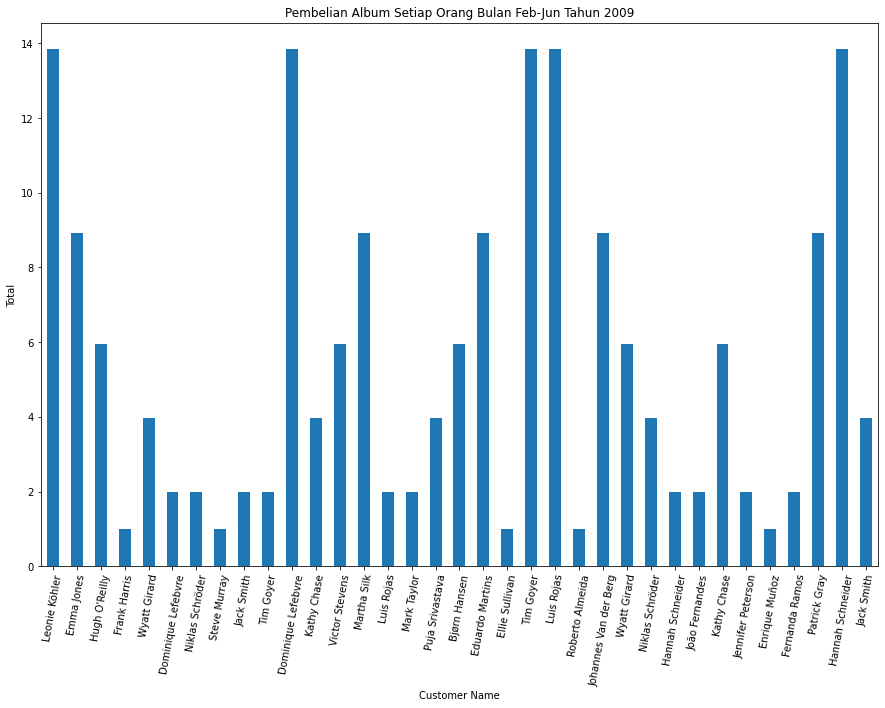

In [9]:
df_chinook.plot(kind='bar',x='Name',y='Total',rot=80,figsize=(15,10),legend=False)
plt.title('Pembelian Album Setiap Orang Bulan Feb-Jun Tahun 2009')
plt.xlabel('Customer Name')
plt.ylabel('Total')
plt.show()

In [10]:
df_groupby1 = df_chinook.groupby(["InvoiceDate"]).agg({"Total":"sum"})
df_groupby1.reset_index()

,InvoiceDate,Total
0,2009-02,37.62
1,2009-03,37.62
2,2009-04,37.62
3,2009-05,37.62
4,2009-06,37.62


In [11]:
cust_country = df_chinook["BillingCountry"].value_counts()
cust_country_fix = pd.DataFrame(cust_country).reset_index()
cust_country_fix.head()

,index,BillingCountry
0,USA,9
1,Germany,5
2,France,4
3,Brazil,3
4,Canada,3


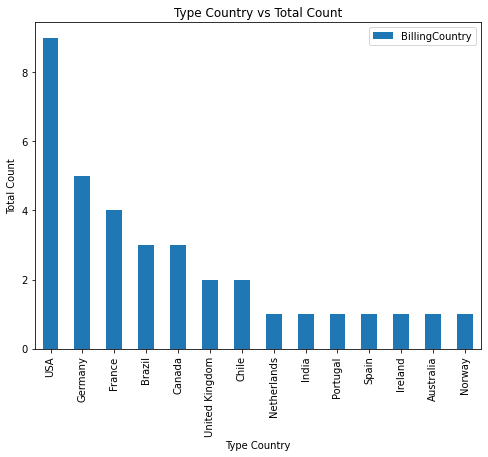

In [12]:
cust_country_fix.plot(kind='bar', x ="index", y="BillingCountry", rot=90, figsize=(8, 6))
plt.xlabel('Type Country')
plt.ylabel('Total Count')
plt.title('Type Country vs Total Count')

plt.show()

In [20]:
df_groupby2 = df_chinook.groupby(["BillingCountry"]).agg({"Total":"sum"})
df_groupby2.reset_index()

,BillingCountry,Total
0,Australia,1.98
1,Brazil,11.88
2,Canada,11.88
3,Chile,15.84
4,France,25.74
5,Germany,35.64
6,India,3.96
7,Ireland,5.94
8,Netherlands,8.91
9,Norway,5.94


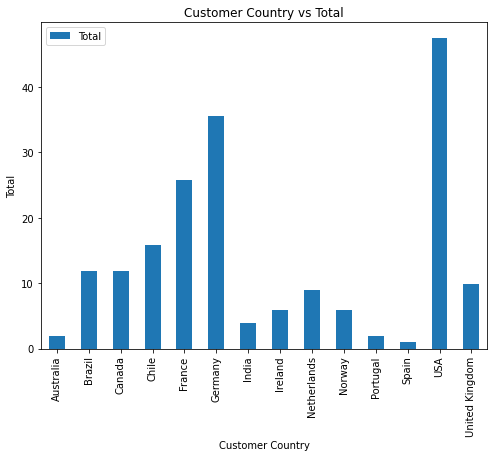

In [14]:
df_groupby2.plot(kind='bar', rot=90, figsize=(8, 6))
plt.xlabel('Customer Country')
plt.ylabel('Total')
plt.title('Customer Country vs Total')

plt.show()

In [15]:
df_groupby3 = df_chinook.groupby(["Name"]).agg({"Total":"sum"})
df_groupby3.reset_index()

,Name,Total
0,Bjørn Hansen,5.94
1,Dominique Lefebvre,15.84
2,Eduardo Martins,8.91
3,Ellie Sullivan,0.99
4,Emma Jones,8.91
5,Enrique Muñoz,0.99
6,Fernanda Ramos,1.98
7,Frank Harris,0.99
8,Hannah Schneider,15.84
9,Hugh O'Reilly,5.94


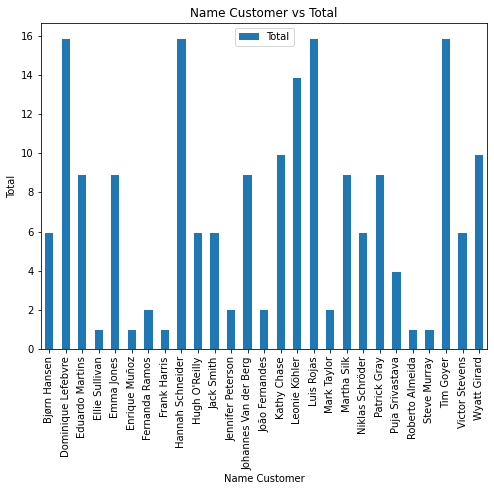

In [16]:
df_groupby3.plot(kind='bar', rot=90, figsize=(8, 6))
plt.xlabel('Name Customer')
plt.ylabel('Total')
plt.title('Name Customer vs Total')

plt.show()